# Question 1
Load the .csv file into a pandas data-frame (DF) called df_prob1 with appropriate rows and columns.  Each row must represent an individual object, while each column must represent a particular attribute (Object Number, Title, Dynasty, etc.)

# Comment:

- I first import the pandas library and then simply use the 'read_csv' method to read the dataset and load it to a data frame.
- To make sure it is done correctly I will print the shape and 5 first rows of the read data


In [35]:
import pandas as pd
df_prob1=pd.read_csv('MetObjects_Subset.csv')
print(f'this data set has {df_prob1.shape[0]} rows and {df_prob1.shape[1]} columns\n')

print('Five first rows of dataset are:')
print(df_prob1.head())    

this data set has 17249 rows and 44 columns

Five first rows of dataset are:
  Object Number  Is Highlight  Is Public Domain  Object ID         Department  \
0    1979.486.1         False             False          1  The American Wing   
1    1980.264.5         False             False          2  The American Wing   
2      67.265.9         False             False          3  The American Wing   
3     67.265.10         False             False          4  The American Wing   
4     67.265.11         False             False          5  The American Wing   

  Object Name                         Title Culture  Period  Dynasty  ...  \
0        Coin  One-dollar Liberty Head Coin     NaN     NaN      NaN  ...   
1        Coin  Ten-dollar Liberty Head Coin     NaN     NaN      NaN  ...   
2        Coin    Two-and-a-Half Dollar Coin     NaN     NaN      NaN  ...   
3        Coin    Two-and-a-Half Dollar Coin     NaN     NaN      NaN  ...   
4        Coin    Two-and-a-Half Dollar Coin     NaN

# Question 2
Many columns of this data are missing entirely (i.e. no values are present for any objects).  Use Python to determine which columns are missing for all of the provided objects and create a modified copy of df_prob1 that excludes these columns entirely called df_prob2.
Hint: You may want to look into the pandas member function isna.


# Comment:
To do this step, I will first check if the number of Nan in a column is equal to the number of rows. if So I will remove that column.

In [36]:
null_col=(df_prob1.isna().sum()==df_prob1.shape[0])
df_prob2 = df_prob1.drop(df_prob1.columns[null_col], axis=1)
print(f'{df_prob1.shape[1]-df_prob2.shape[1]} colums were null and removed from dataset. So, number of columns change to: {df_prob2.shape[1]} \n')

print(f'Non null colums are:\n {df_prob2.columns}')

9 colums were null and removed from dataset. So, number of columns change to: 35 

Non null colums are:
 Index(['Object Number', 'Is Highlight', 'Is Public Domain', 'Object ID',
       'Department', 'Object Name', 'Title', 'Culture', 'Artist Role',
       'Artist Prefix', 'Artist Display Name', 'Artist Display Bio',
       'Artist Suffix', 'Artist Alpha Sort', 'Artist Nationality',
       'Artist Begin Date', 'Artist End Date', 'Object Date',
       'Object Begin Date', 'Object End Date', 'Medium', 'Dimensions',
       'Credit Line', 'Geography Type', 'City', 'State', 'County', 'Country',
       'Region', 'Classification', 'Rights and Reproduction', 'Link Resource',
       'Metadata Date', 'Repository', 'Tags'],
      dtype='object')


# Question 3
Suppose we are only interested in North American objects.  You are to create a copy of df_prob2 and remove any objects whose Country column does not include one of “United States,” “Mexico” or “Canada” (with these specific capitalizations only), and store the result (data-frame with NA objects only) into a variable with the name df_prob3.   Note that some objects have two or more countries.  If the Country string includes any of the above (“United States”, “Mexico”, “Canada”) as a substring at least once, it should be present in df_prob3.
Hint: you can use regular expressions for this problem, but it is not required, nor is it necessarily the easiest way to handle the problem.


# Comment:
The country column is a series of strings, So the str attribute can be used to call string methods on its elements. The 'contains' method can be used to search for the 'United States', 'Mexico', and 'Canada' substrings at the same time in each row. The result will create a T/F list that can be applied as a mask to get a subset of DataFrame that is wanted.

- The case argument is set to True to specify to match only with the determined capitalizations.
- The na argument is used to match only the not NULL fields to prevent value Error.

to check the result, the number of rows that has United States, Mexico or Canada as their countries is compaired with the total number of rows in df_prob3


In [37]:
df_prob3 = df_prob2.loc[df_prob2['Country'].str.contains( "United States|Mexico|Canada" , na=False , case=True)]
print(f'Number of rows that has United States, Mexico or Canada as their countries:{sum(df_prob3["Country"].str.contains( "United States|Mexico|Canada" , case=True))}')
print(f'Total number of rows:{df_prob3.shape[0]}')

Number of rows that has United States, Mexico or Canada as their countries:7891
Total number of rows:7891


# Question 4
The objects in the dataset include a start year (“Object Begin Date”) and completion year (“Object End Date”).  For this part you are to create a copy of df_prob3 that includes objects with a start year before (not including) 1901 – representing pre-20th century art, and name it df_prob4.

# Comment:
Like previous question, first a T/F list is created based on compairing begin years with 1901. Then the result of this comparisin is applied as a mask to select only the rows that their years are before than 1901.

To check the result:
- The statistical information of the 'Object begin date' in df_prob 4 is shown which includes min and max (max is 1900)
- 10 first rows of the created data frame is prined


In [38]:
df_prob4=df_prob3.loc[df_prob3['Object Begin Date']<1901]

print(f'The statistical information of the \'Object Begin Date\' is:\n{df_prob4["Object Begin Date"].describe()}')
print('\n')
print(f'The first 10 \'Object Begin Date\' valeus in the dataframe are:\n{df_prob4["Object Begin Date"].head(10)}')

The statistical information of the 'Object Begin Date' is:
count    7226.000000
mean     1821.417520
std        70.606248
min         0.000000
25%      1794.000000
50%      1830.000000
75%      1870.000000
max      1900.000000
Name: Object Begin Date, dtype: float64


The first 10 'Object Begin Date' valeus in the dataframe are:
14    1665
15    1800
16    1867
17    1860
18    1859
19    1860
20    1859
23    1860
24    1860
25    1860
Name: Object Begin Date, dtype: int64


# Question 5
For this part, you are to create a copy of df_prob4 called df_prob5 and add a new column to df_prob5 called CrDuration, which represents the difference between the start year and end year (note that many values for this column will be 0, indicating no difference  between the start and end year, while others may exceed 100 years.)

# Comment:
To keep df_prob4 unchanged, first a deep copy of it is created in df_prob5. Then an new column named CrDuration is added to df_prob5 that each value of it is obtained by subtraction of df_prob4['Object End Date'] and df_prob4['Object Begin Date'] in the same raw.

to check the result:
- The statistical information of the 'CrDuration' is represented
- The first 10 rows in the dataframe for start date, end date and duration is shown:

In [39]:
df_prob5=df_prob4.copy(deep=True)
df_prob5['CrDuration']=df_prob4['Object End Date']-df_prob4['Object Begin Date']
print(f'The statistical information of the \'CrDuration\' is:\n{df_prob5["CrDuration"].describe()}')
print('\n')
print(f'The first 10 rows in the dataframe shows:\n{df_prob5[["Object Begin Date","Object End Date","CrDuration"]].head(10)}')

The statistical information of the 'CrDuration' is:
count    7226.000000
mean       20.415583
std        26.065913
min         0.000000
25%         3.000000
50%        10.000000
75%        28.000000
max       200.000000
Name: CrDuration, dtype: float64


The first 10 rows in the dataframe shows:
    Object Begin Date  Object End Date  CrDuration
14               1665             1700          35
15               1800             1900         100
16               1867             1867           0
17               1860             1860           0
18               1859             1859           0
19               1860             1860           0
20               1859             1859           0
23               1860             1870          10
24               1860             1870          10
25               1860             1870          10


# Question 6
Most objects in the dataset have a Classification.  For this problem, you are to produce a bar plot depicting the ten most common Classifications for objects in df_prob5, with classification labels on the x-axis and counts on the y-axis, sorted in descending order of counts from left to right.  The example below should give you an idea of the format you want to use, but note that this was generated using the basic DataFrame (df_prob1) and will not reflect the expected results you will observe for df_prob5.  In fact, you should not see “Paintings” on your plot at all

# Comment:
- To count the number of object in each class first 'group_by' method is used to group all items bades on their classification value. Because 'Object ID' is not Nan, it is used to obtain the number of items in each category.
- Then sort_values(ascending=False) is used to sort all classes based on their number in descending order.
- Finally the bar plot is produced

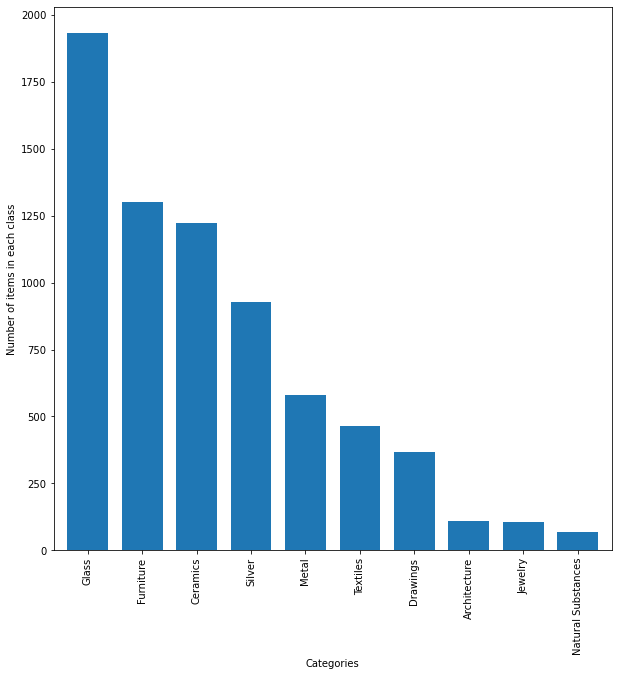

In [40]:
import matplotlib.pyplot as plt
classes=df_prob5.groupby(by=["Classification"])['Object ID'].count()
ten_most_common_classes=classes.sort_values(ascending=False)[0:10]

# bar plot: 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
ten_most_common_classes.plot.bar(align = 'center', width = 0.75)
plt.ylabel('Number of items in each class')
plt.xlabel('Categories')
plt.show()